#### Dataset:
Using the Online retail dataset to apply the association rules.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

df=pd.read_excel(r"C:\Users\Parvathy Shine\Desktop\Assignments\10. Association Rules\Association Rules\Online retail.xlsx",header=None) # Since there is no header just a list of values
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


#### Data Preprocessing:

In [2]:
# Association Rule Mining (e.g., using the Apriori algorithm) : We typically need to convert it into a format where each row is a transaction and each transaction is a list of items.

# Handling missing values
df.dropna(inplace=True)

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Converting Transactions to Lists (bcoz then only we can apply the Apriori algorithm)
transactions = df[0].apply(lambda x: x.split(',')).tolist() 
#   a.) First select coloumn 0.    b.) "For each row 'x', split the string wherever there's a comma. c.) then to a list

print(transactions[:5])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


#### Association Rule Mining:

In [3]:
!pip install mlxtend

In [4]:
# Covert into One-hot encoding : (cat to num variables)

from mlxtend.preprocessing import TransactionEncoder 
te = TransactionEncoder() # Converts the list to One-hot Encoded Dataframe
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_) #Converts the array to Pandas Dataframe , then uses product names as the column headers(te.columns_).
print(df.head(1))

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False              True              False   

   whole wheat rice  yams  yogurt cake  zucchini  
0             False  True        False     False  

[1 rows x 120 columns]


In [5]:
# Applying the Apirori Algorithm with a min threshold:

from mlxtend.frequent_patterns import apriori # Find combinations of itms taht are brought together
frequent_items = apriori(df, min_support=0.01, use_colnames=True) #.01% threshold
print(frequent_items)

      support                               itemsets
0    0.029366                              (almonds)
1    0.011206                    (antioxydant juice)
2    0.045981                              (avocado)
3    0.012558                                (bacon)
4    0.015456                       (barbecue sauce)
..        ...                                    ...
433  0.014683  (olive oil, mineral water, spaghetti)
434  0.016615   (mineral water, pancakes, spaghetti)
435  0.012365     (mineral water, shrimp, spaghetti)
436  0.010819       (mineral water, soup, spaghetti)
437  0.013524   (mineral water, spaghetti, tomatoes)

[438 rows x 2 columns]


In [6]:
# Association Rules: 

#Using Lift as metric
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0) # can use metric="confidence"/metric="support" 
print("Rules with lift ≥ 1.2:")
print(rules)

Rules with lift ≥ 1.2:
                   antecedents                 consequents  \
0              (mineral water)                   (almonds)   
1                    (almonds)             (mineral water)   
2                  (chocolate)                   (avocado)   
3                    (avocado)                 (chocolate)   
4               (french fries)                   (avocado)   
..                         ...                         ...   
835  (mineral water, tomatoes)                 (spaghetti)   
836      (spaghetti, tomatoes)             (mineral water)   
837            (mineral water)       (spaghetti, tomatoes)   
838                (spaghetti)   (mineral water, tomatoes)   
839                 (tomatoes)  (mineral water, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.299845            0.029366  0.011012    0.036727  1.250644   
1              0.029366            0.299845  0.011012    0.375000  1.25064

In [7]:
#Using confidence as metric
rules_confidence = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
print("Rules with confidence ≥ 0.3:")
print(rules_confidence)

Rules with confidence ≥ 0.3:
                   antecedents      consequents  antecedent support  \
0                    (almonds)  (mineral water)            0.029366   
1                    (avocado)  (mineral water)            0.045981   
2                   (brownies)  (mineral water)            0.045015   
3                    (burgers)           (eggs)            0.113794   
4                    (burgers)  (mineral water)            0.113794   
..                         ...              ...                 ...   
145        (shrimp, spaghetti)  (mineral water)            0.030332   
146      (mineral water, soup)      (spaghetti)            0.033423   
147          (spaghetti, soup)  (mineral water)            0.020672   
148  (mineral water, tomatoes)      (spaghetti)            0.034583   
149      (spaghetti, tomatoes)  (mineral water)            0.029946   

     consequent support   support  confidence      lift  representativity  \
0              0.299845  0.011012    0.37

In [8]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5172,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
5173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Analysis and Interpretation:

In [9]:
#Lift-based rules to see how strong the relationship is.

#Confidence-based rules to see how likely the consequence is.

#Support-based rules to check how frequent the rule is overall.

# Display the top 10 rules sorted by highest lift
top_lift_rules = rules.sort_values(by="lift", ascending=False).head(10)
print("Top 10 Rules by Lift:")
print(top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Display the top 10 rules sorted by highest confidence
top_confidence_rules = rules.sort_values(by="confidence", ascending=False).head(10)
print("\nTop 10 Rules by Confidence:")
print(top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Find rules with both high lift and high confidence (e.g., lift > 2, confidence > 0.5)
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print("\nHigh-Quality Rules (Lift > 2 and Confidence > 0.5):")
print(high_quality_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Analyze specific items (e.g., find rules where 'mineral water' is involved)
mineral_water_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in str(x)) | rules['consequents'].apply(lambda x: 'mineral water' in str(x))]

print("\nRules Involving 'Mineral Water':")
print(mineral_water_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 10 Rules by Lift:
                        antecedents                     consequents   support  \
425             (whole wheat pasta)                     (olive oil)  0.011012   
424                     (olive oil)             (whole wheat pasta)  0.011012   
792           (mineral water, milk)                          (soup)  0.012365   
797                          (soup)           (mineral water, milk)  0.012365   
299                   (ground beef)                 (herb & pepper)  0.022798   
298                 (herb & pepper)                   (ground beef)  0.022798   
734         (mineral water, shrimp)             (frozen vegetables)  0.010433   
739             (frozen vegetables)         (mineral water, shrimp)  0.010433   
716  (frozen vegetables, spaghetti)                   (ground beef)  0.012558   
721                   (ground beef)  (frozen vegetables, spaghetti)  0.012558   

     confidence      lift  
425    0.271429  3.094525  
424    0.125551  3.094525  
79

### Insights:
1. Top Lift Rules:
items like olive oil and whole wheat pasta have a strong association (lift = 3.09), indicating that customers who buy one are three times more likely to buy the other.

2. High Confidence Rules:
Rules like (milk, soup - mineral water) show that when customers buy milk and soup, there's a 57.6% chance they'll also purchase mineral water. 

3. High-Quality Rules (Lift > 2 and Confidence > 0.5):
The rule (ground beef, frozen vegetables → spaghetti) suggests a strong association both in terms of likelihood and strength. This trio could be marketed together as a meal pack to increase sales.

4. Product-Specific Insights:
Mineral water appears frequently in strong rules, especially with healthy or staple food items. 

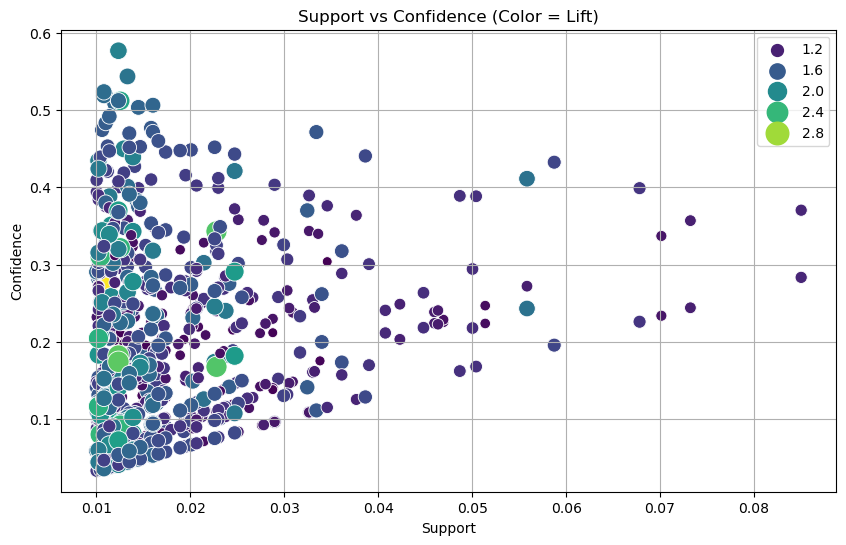

In [10]:
# Scatter Plot of Support vs Confidence vs Lift:

plt.figure(figsize=(10,6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', size='lift', palette='viridis', sizes=(50, 300))
plt.title('Support vs Confidence (Color = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()
plt.grid(True)
plt.show()

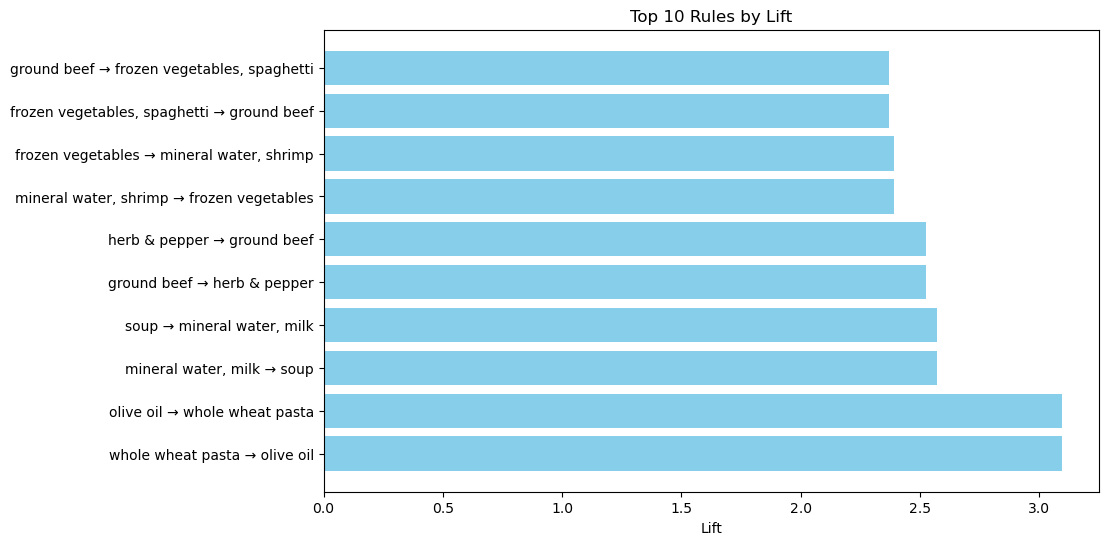

In [11]:
# Top 10 Rules by Lift – Bar Plot
top10_lift = rules.sort_values(by='lift', ascending=False).head(10)

import numpy as np
plt.figure(figsize=(10,6))
plt.barh(range(10), top10_lift['lift'], color='skyblue')
plt.yticks(range(10), [f"{', '.join(list(a))} → {', '.join(list(c))}" for a, c in zip(top10_lift['antecedents'], top10_lift['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Rules by Lift')
plt.show()

1. lift and why is it important in Association rules.
<br>Lift tells us how much two items happen together compared to if they were totally unrelated.
<br>Lift = (Confidence / (Support of consequent))
<br>Importance:
<br>Lift > 1 means positive correlation: A and B appear together more often than random chance.
<br>Lift = 1 means independence.
<br>Lift < 1 means negative correlation.
<br>         It helps identify strong, meaningful rules beyond simple co-occurrence.

<br>2. Support and Confidence. How do you calculate them?
<br>Support : The proportion (or frequency) of transactions that contain a particular itemset.
<br>Formula - Support(A) = Number of Transactions containing A / Total transactions
<br>Support measures how popular or frequent an itemset is.
    
<br>Confidence : The conditional probability that a transaction contains the consequent given the antecedent.
<br>Formula - Confidence(A to B) - Support(Ato B)/Support(A)
<br>Support measures the reliability of the rule A to B
    
<br>3. Limitations or challenges of Association rules mining.
<br>1. Handling Large Datasets : Association rules mining can be computationally expensive and may not be suitable for very large datasets.
<br>2. Noise and Missing Values : Noise and missing values in the data can lead to inaccurate or misleading rules.
<br>3. Overfitting : Generating too many rules can lead to overfitting, making it difficult to identify meaningful patterns.